In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# EDA 

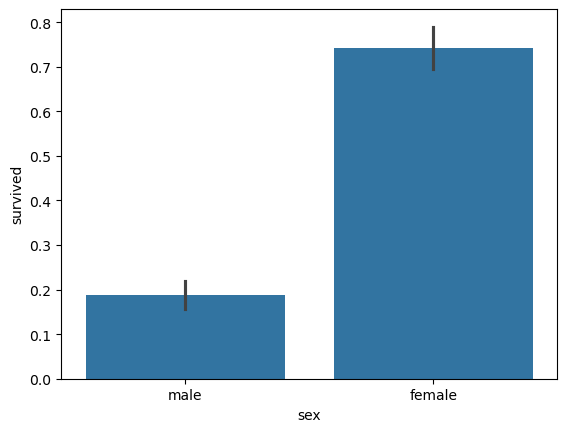

In [6]:
sns.barplot(data=df, x="sex", y="survived")
plt.show()

In [7]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

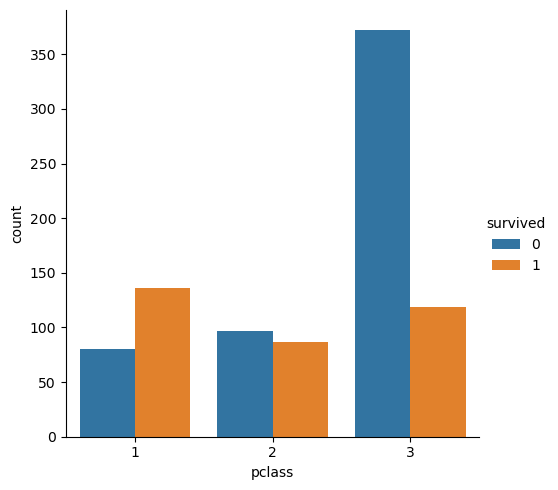

In [8]:
sns.catplot(data=df, x="pclass", hue="survived", kind="count")
plt.show()

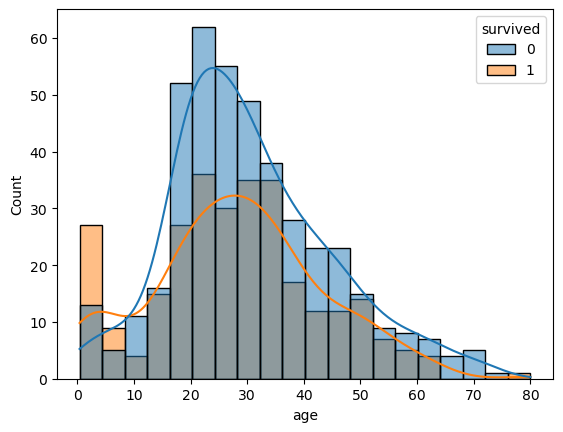

In [9]:
sns.histplot(data=df, x="age", hue="survived", kde=True)
plt.show()

In [10]:
df["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

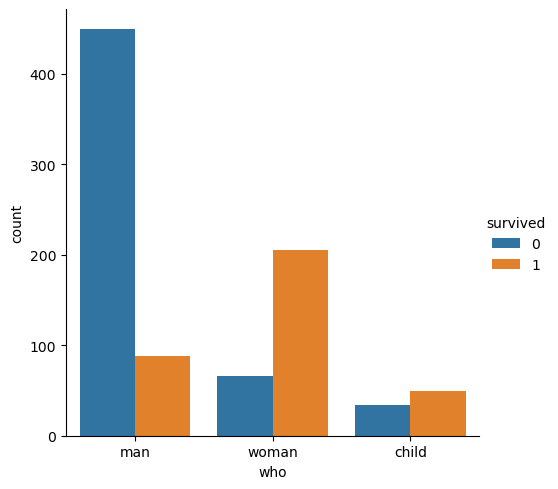

In [11]:
sns.catplot(data=df, x="who", hue="survived", kind="count")
plt.show()

In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
df.shape

(891, 15)

In [14]:
df = df.drop(["deck", "embark_town", "alive"], axis=1)

In [15]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alone           0
dtype: int64

In [16]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df["age"] = df["age"].fillna(df["age"].median())

In [18]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [19]:
df["embarked"].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [20]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [21]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [22]:
df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [23]:
df["embarked"].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [24]:
df["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [25]:
df = df.drop("sex", axis=1)

In [26]:
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,35.0,0,0,8.0500,S,Third,man,True,True


In [27]:
df["adult_male"] = df["adult_male"].astype("int64")
df["alone"] = df["alone"].astype("int64")

In [28]:
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,22.0,1,0,7.2500,S,Third,man,1,0
1,1,1,38.0,1,0,71.2833,C,First,woman,0,0
2,1,3,26.0,0,0,7.9250,S,Third,woman,0,1
3,1,1,35.0,1,0,53.1000,S,First,woman,0,0
4,0,3,35.0,0,0,8.0500,S,Third,man,1,1


In [29]:
X = df.drop("survived", axis=1)
y = df["survived"]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [32]:
categorical_cols = ["class", "embarked", "who"]

preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
],remainder="passthrough")
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [33]:
encoded_cols = preprocessor.get_feature_names_out()

In [34]:
X_train = pd.DataFrame(X_train, columns=encoded_cols)
X_test = pd.DataFrame(X_test, columns=encoded_cols)

In [35]:
X_train

,cat__class_Second,cat__class_Third,cat__embarked_Q,cat__embarked_S,cat__who_man,cat__who_woman,remainder__pclass,remainder__age,remainder__sibsp,remainder__parch,remainder__fare,remainder__adult_male,remainder__alone
0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,27.0,0.0,0.0,7.8958,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,2.0,17.0,0.0,0.0,10.5000,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0000,1.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,3.0,26.0,0.0,0.0,8.0500,1.0,1.0
4,0.0,1.0,0.0,1.0,1.0,0.0,3.0,43.0,0.0,0.0,8.0500,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0.0,1.0,0.0,1.0,1.0,0.0,3.0,28.0,0.0,0.0,7.8958,1.0,1.0
664,0.0,0.0,0.0,1.0,0.0,1.0,1.0,19.0,0.0,0.0,30.0000,0.0,1.0
665,0.0,0.0,0.0,0.0,1.0,0.0,1.0,48.0,1.0,0.0,76.7292,1.0,0.0
666,1.0,0.0,0.0,1.0,1.0,0.0,2.0,18.0,0.0,0.0,11.5000,1.0,1.0


In [36]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [37]:
import lightgbm as lgb

In [38]:
from sklearn.metrics import classification_report, confusion_matrix 

In [39]:
clf = lgb.LGBMClassifier(verbosity=-1)
clf.fit(X_train, y_train)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [40]:
y_pred = clf.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       127
           1       0.79      0.76      0.78        96

    accuracy                           0.81       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.81      0.81      0.81       223

[[108  19]
 [ 23  73]]


In [42]:
importances = clf.feature_importances_

feature_names = X_train.columns
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance" : importances
}).sort_values(by="Importance", ascending=False)

In [43]:
feature_importance
# kolonların modele etkisi

,Feature,Importance
10,remainder__fare,1158
7,remainder__age,882
8,remainder__sibsp,78
3,cat__embarked_S,72
1,cat__class_Third,63
4,cat__who_man,63
5,cat__who_woman,46
12,remainder__alone,46
9,remainder__parch,41
0,cat__class_Second,37


In [44]:
#hyperparameter tuning

In [45]:
from sklearn.model_selection import RandomizedSearchCV

lgb_model = lgb.LGBMClassifier(verbosity=-1)

param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'num_leaves': [15, 31, 63, 127],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [46]:
# Randomized search
random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid, cv=5, scoring='accuracy',
verbose=1, n_jobs=-1)

In [47]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,LGBMClassifier(verbosity=-1)
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], 'min_child_samples': [5, 10, ...], ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [48]:
random_search.best_params_

{'subsample': 0.8,
 'num_leaves': 15,
 'n_estimators': 100,
 'min_child_samples': 5,
 'max_depth': -1,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6}

In [49]:
y_pred = random_search.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       127
           1       0.83      0.78      0.81        96

    accuracy                           0.84       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223

[[112  15]
 [ 21  75]]


In [51]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       127
           1       0.76      0.75      0.75        96

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

[[104  23]
 [ 24  72]]


In [53]:
params = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [54]:
random_search = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=params, cv=5, scoring='accuracy', n_jobs=-1)

In [55]:
random_search.fit(X_train, y_train)

C:\Users\Semih Neccar\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Semih Neccar\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Semih Neccar\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Semih Neccar\AppData\Roaming\Python\Python312\site-packages\xgboost\sklea

,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], 'n_estimators': [100, 300, ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [56]:
y_pred = random_search.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       127
           1       0.85      0.80      0.82        96

    accuracy                           0.85       223
   macro avg       0.85      0.85      0.85       223
weighted avg       0.85      0.85      0.85       223

[[113  14]
 [ 19  77]]
